In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

## Import

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.sample(5)

,Age,EstimatedSalary,Purchased
323,48,30000,1
50,24,32000,0
302,37,137000,1
384,57,33000,1
224,35,60000,0


In [4]:
dataset.describe(include='all')

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [6]:
X.shape, y.shape

((400, 2), (400,))

## Test train split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
classifier = RandomForestClassifier(criterion='entropy',
                                    n_estimators=10,
                                    random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Prediction

In [13]:
# Predict a customer that is 30yo with estimated salary of $87K
classifier.predict(sc.transform([[30,87000]]))

array([0])

In [14]:
# Predicting test set results
y_pred = classifier.predict(X_test)

# Evaluation

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
cf = confusion_matrix(y_test,y_pred)

In [17]:
import seaborn as sns

Accuracy: 0.91


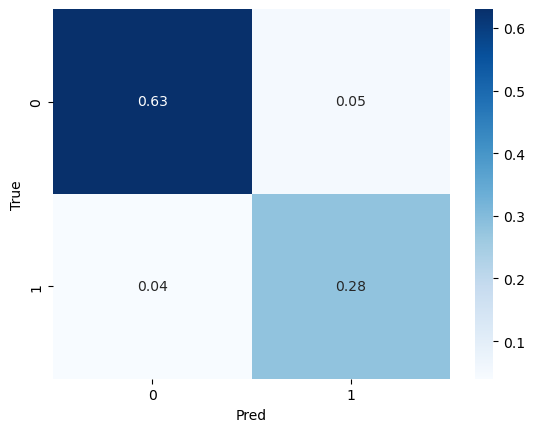

In [18]:
sns.heatmap(cf/cf.sum(),annot=True,cmap='Blues')
plt.ylabel('True')
plt.xlabel('Pred')
print(f'Accuracy: {accuracy_score(y_test,y_pred)}')

# Visualising results

## Training

/var/folders/82/b18r5lg13lj0jsssnjzrfj780000gn/T/ipykernel_4168/549010019.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


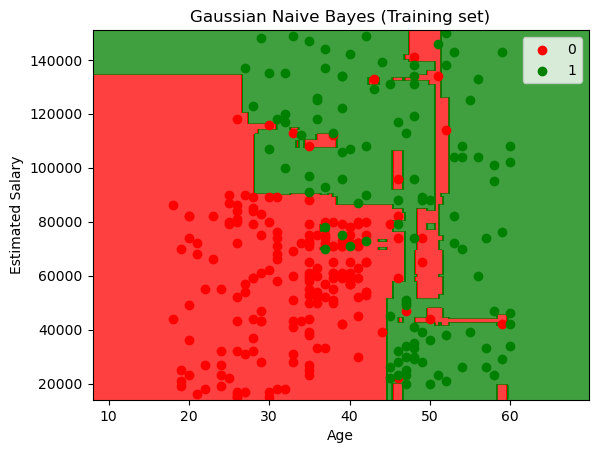

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Gaussian Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Test

/var/folders/82/b18r5lg13lj0jsssnjzrfj780000gn/T/ipykernel_4168/3238745115.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


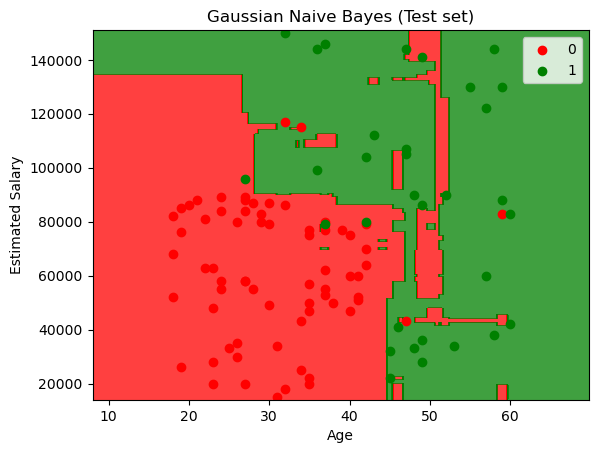

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Gaussian Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()